In [1]:
%kk 1

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>!kk1:active>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [2]:
%matplotlib inline
#在多个单元格内操作同一幅图图片
%config InlineBackend.close_figures = False 
set_matplotlib_formats('svg')

## 快速绘图

### 使用pyplot模块绘图

pyplot模块的基本函数

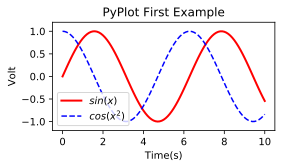

In [3]:
x = np.linspace(0, 10, 101)
y = np.sin(x); z = np.cos(x)

# 设置图片的大小, 使用axis('equal')时长宽要一致
plt.figure(figsize=(4,2)) 
# label字符串中出现$$时会自动调用内嵌的LaTex引擎
plt.plot(x,y,label="$sin(x)$",color="red",linewidth=2)
# 关键字参数不区分大小写, 并且可以使用缩写 linewidth=lw
plt.plot(x,z,"b--",label="$cos(x^2)$")
# 图像的标题,标签,轴范围,图例
plt.title("PyPlot First Example") 
plt.xlabel("Time(s)") 
plt.ylabel("Volt") 
plt.ylim(-1.2,1.2) 
plt.legend() 
# 显示图像
plt.show() 

保存图像: savefig()

In [4]:
plt.savefig("data/4-1.png", dpi=80) # dpi:表示每英寸上的像素数,长320, 宽160

将图片保存为字符串

In [5]:
import io
buf = io.BytesIO() # 创建一个用来保存图像内容的BytesIO对象
plt.savefig(buf, fmt="png") # 将图像以png格式保存进buf中
buf.getvalue()[:20] # 显示图像内容的前20个字节

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 '

在设置`%config InlineBackend.close_figures = False`后需要显示的`显示`和`关闭`图形对象, 否则会导致一次性输出多个图形对象;

In [6]:
plt.close()

### 面向对象方式绘图

matplotlib是一个面向对象的绘图库, 而pyplot模块将其包装成了只使用函数的API;  
plot()函数实则调用的子图对象的plot()方法;

In [7]:
def plot(*args, **kwargs):
    ax = gca()
    try:
        ret = ax.plot(*args, **kwargs)
    finally: pass
    return ret

gcf(): 获得当前图表对象, Figure;  
gca(): 获得当前`坐标轴对象`, Axes;   
* 因为一个子图对象中只含有一个坐标轴, 所以坐标轴对象也可被称之为子图对象;

In [8]:
fig = plt.gcf()
axes = plt.gca()
plt.close()
%P fig; axes

 1: Figure(432x288),     2: AxesSubplot(0.125,0.125;0.775x0.755),    


### 配置属性

matplotlib图表的每一个组成部分都与一个对象相对应;  
* pyplot模块将这些属性设置方法包装成属性设置函数`setp()`, 可一次性设置多种属性;  

设置图形对象的属性: `set_*()`;  

In [9]:
plt.close('all')

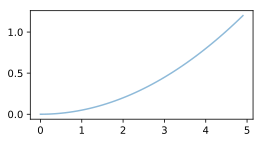

In [10]:
plt.figure(figsize=(4, 2))
x = np.arange(0, 5, 0.1)
line = plt.plot(x, 0.05*x*x)[0] # plot返回值的类型实则是一个Line2D组成的列表
line.set_alpha(0.5) # 透明度
plt.show()

查看Line2D对象可设置的所有属性

In [11]:
%col 5 dir2(line, patterns=['set*'])

set             |set_aa              |set_agg_filter      |set_alpha           |set_animated           |
set_antialiased |set_c               |set_clip_box        |set_clip_on         |set_clip_path          |
set_color       |set_contains        |set_dash_capstyle   |set_dash_joinstyle  |set_dashes             |
set_data        |set_drawstyle       |set_figure          |set_fillstyle       |set_gid                |
set_label       |set_linestyle       |set_linewidth       |set_ls              |set_lw                 |
set_marker      |set_markeredgecolor |set_markeredgewidth |set_markerfacecolor |set_markerfacecoloralt |
set_markersize  |set_markevery       |set_mec             |set_mew             |set_mfc                |
set_mfcalt      |set_ms              |set_path_effects    |set_picker          |set_pickradius         |
set_rasterized  |set_sketch_params   |set_snap            |set_solid_capstyle  |set_solid_joinstyle    |
set_transform   |set_url             |set_visible      

'51'

一次性的设置图形对象的多个属性: plt.setp()

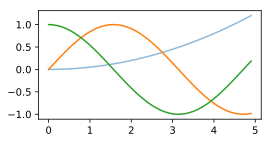

In [12]:
lines = plt.plot(x, np.sin(x), x, np.cos(x)) # lines 是有两个Line2D对象的列表
plt.show()

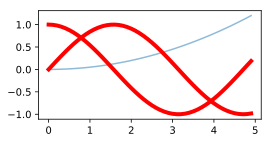

In [13]:
plt.setp(lines, color="r", linewidth=4.0)
plt.show()

获取图形对象的相关属性: 
1. 绘图对象的`get_*()`方法;  
2. `plt.getp()`函数;  
    * 指定属性名: 返回对象关于此属性的值;
    * 不指定属性名: 返回该对象的所有属性和值;

In [14]:
%P line.get_c(); plt.getp(lines[0], "linewidth") # lines[0],不能是lines

 1: #1f77b4,     2: 4.000,    


查看图形对象的所有属性

In [15]:
f = plt.gcf()
#plt.getp()只有对象参数, 没有属性参数
plt.getp(f) 

    agg_filter = None
    alpha = None
    animated = False
    axes = [<matplotlib.axes._subplots.AxesSubplot object at ...
    children = [<matplotlib.patches.Rectangle object at 0x0000022...
    clip_box = None
    clip_on = True
    clip_path = None
    constrained_layout = False
    constrained_layout_pads = (0.04167, 0.04167, 0.02, 0.02)
    contains = None
    default_bbox_extra_artists = [<matplotlib.axes._subplots.AxesSubplot object at ...
    dpi = 72.0
    edgecolor = (1.0, 1.0, 1.0, 0.0)
    facecolor = (1.0, 1.0, 1.0, 0.0)
    figheight = 2.0
    figure = None
    figwidth = 4.0
    frameon = True
    gid = None
    label = 
    path_effects = []
    picker = None
    rasterized = None
    size_inches = [4. 2.]
    sketch_params = None
    snap = None
    tight_layout = False
    transform = IdentityTransform()
    transformed_clip_path_and_affine = (None, None)
    url = None
    visible = True
    window_extent = TransformedBbox(     Bbox(x0=0.0, y0=0.0, x1=4.0, ...
    

查看图形对象中`轴类对象`的属性;  

In [16]:
%P plt.getp(f, "axes")

 1: [<matplotlib.axes._subplots.AxesSubplot object at 0x00000220DACCE940>],    


轴类对象的第一个元素就是单前轴对象(`AxesSubplot`): plt.gca()

In [17]:
%P plt.getp(f, "axes")[0]; plt.gca()

 1: AxesSubplot(0.125,0.125;0.775x0.755),     2: AxesSubplot(0.125,0.125;0.775x0.755),    


继续查看单前轴对象中的线对象`lines`

In [18]:
lines_all = plt.getp(plt.gca(), "lines")
%P lines_all; lines_all[0] is line

 1: <a list of 3 Line2D objects>,     2: 1.000,    


通过面向对象的方式直接获取图元(对象)的属性

In [19]:
%P f.axes;; plt.getp(f, 'axes') #函数接口

 1: [<matplotlib.axes._subplots.AxesSubplot object at 0x00000220DACCE940>],    
 2: [<matplotlib.axes._subplots.AxesSubplot object at 0x00000220DACCE940>],    


In [20]:
%P len(f.axes[0].lines); len(lines_all)

 1: 3.000,     2: 3.000,    


### 绘制多子图

**plt.subplot(numRows, numCols, plotNum)**:  对当前子图进行分割, 获得多子图;  
* `numRows`为假想的行分割线的个数, `numCols为列分割线的个数;
* `plotNum`为行列分割线所划分区域的编号(从左到右,从上到下);  
* 如果三个参数中的最大值小于10, 则三个参数之间的分隔逗号可以省略不写;

在Figure对象中创建多个子图对象, 并设置不同的背景色

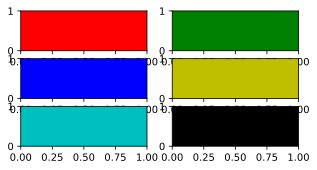

In [21]:
plt.figure(figsize=(5,2.5)) 
for idx, color in enumerate("rgbyck"):  
    plt.subplot( 321 + idx, facecolor=color) 

如何设置奇数个子图

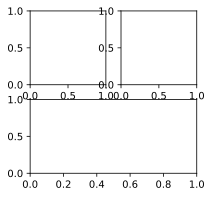

In [22]:
plt.close('all')
plt.figure(figsize=(3,3))
plt.subplot(221) # 第一行的左图
plt.subplot(222) # 第一行的右图
plt.subplot(212) # 第二整行
plt.show()

同时在多个图形对象和多个子图中进行绘图

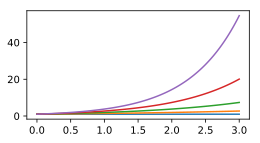

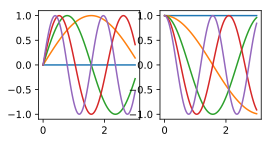

In [23]:
# 创建多个图形对象
plt.close('all')
plt.figure(1, figsize=(4,2)) 
plt.figure(2, figsize=(4,2)) 
# 在图形对象2中创建多个子图
ax1 = plt.subplot(121) 
ax2 = plt.subplot(122) 
# 离散点
x = np.linspace(0, 3, 100)
for i in range(5):
    # 在图形对象1中进行绘图
    plt.figure(1)
    plt.plot(x, np.exp(i*x/3))
    # 在图形对象2中进行绘图
    plt.sca(ax1)# 子图1 
    plt.plot(x, np.sin(i*x))
    plt.sca(ax2) # 子图2
    plt.plot(x, np.cos(i*x))

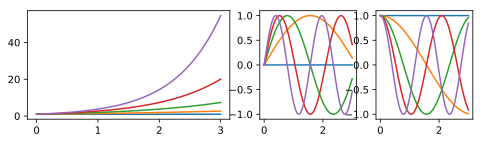

In [24]:
# 单个图形对象
plt.close('all')
plt.figure(figsize=(8,2)) 
# 在图形对象2中创建多个子图
ax1 = plt.subplot(121) 
ax2 = plt.subplot(143) 
ax3 = plt.subplot(144) 

x = np.linspace(0, 3, 100)
for i in range(5):
    ax1.plot(x, np.exp(i*x/3))
    ax2.plot(x, np.sin(i*x))
    ax3.plot(x, np.cos(i*x))

plt.subplots(): 一次生成多个子图;  
* 返回一个图形对象和一个子图数组;  
* 数组的形状和图形对象中子图的排列方式相同;

 1: Figure(216x144),     2: (2, 3),     3: AxesSubplot(0.125,0.536818;0.227941x0.343182),    


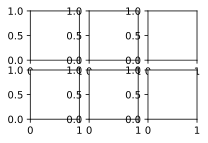

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(3,2))
[a, b, c], [d, e, f] = axes
%P fig; axes.shape; a

plt.subplot2grid(shape, loc, rowspan=1, colspan=1): 实现子图对象的表格布局方式;
* `shape`: 分割图形对象的表格的形状;
* `loc`: 子图左上角所在的行列坐标;
* `rowspan(colspan)`: 表示子图所占据的行数或列数, 默认为1;
* 表格的参考系与二维数组的参考系相同;

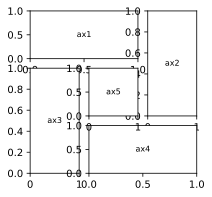

In [26]:
fig = plt.figure(figsize=(3, 3))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax2 = plt.subplot2grid((3, 3), (0, 2), rowspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 0), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 1), colspan=2)
ax5 = plt.subplot2grid((3, 3), (1, 1));

for idx, ax in enumerate(fig.axes, 1): # 1可以表示枚举的起点
    ax.text(0.5, 0.5, "ax{}".format(idx), ha="center", va="center", fontsize=8)

### 配置文件

matplotlib的配置文件为**matplotlibrc**;  
1. 配置文件的可存放路径:
    * 当前路径: 当前目录`pwd`;
    * 用户配置路径: `~/ .matplotlib` 目录下
    * 系统配置路径: `site-packages/matplotlib/mpl-data`

1. 查询当前所用配置文件的路径:  
    * `os.path.abspath(matplotlib.matplotlib_fname())`

1. `matplotlib.rcParams()`: 将当前配置文件转化为一个字典;   
    * 其结果已经被保存在`,matplotlib.rcParams`变量当中;

查看配置字典的长度

In [27]:
len(list(matplotlib.rcParams))

296

通过`matplotlib.rcParams`字典修改图元的默认属性

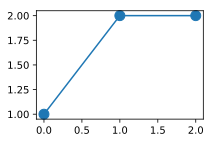

In [28]:
plt.close('all')
plt.figure(figsize=(3,2))
matplotlib.rcParams["lines.marker"] = "o"
matplotlib.rcParams["lines.markersize"] = "10"
plt.plot([1,2,2])
plt.show()

通过`matplotlib.rc()`函数修改图元的默认属性

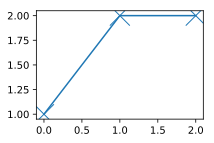

In [29]:
plt.close('all')
plt.figure(figsize=(3,2))
matplotlib.rc("lines", marker="x", markersize='20', color='red') #color为啥不管是?
plt.plot([1,2,2])
plt.show()

恢复默认配置

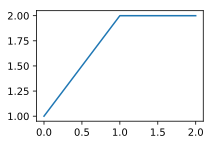

In [30]:
matplotlib.rcdefaults()
plt.close('all')
plt.figure(figsize=(3,2))
plt.plot([1,2,2])
plt.show()

style.available: 查看所有的绘图样式

In [31]:
from matplotlib import style
%col 5 style.available

bmh           |classic           |dark_background |fast               |fivethirtyeight      |
ggplot        |grayscale         |seaborn-bright  |seaborn-colorblind |seaborn-dark-palette |
seaborn-dark  |seaborn-darkgrid  |seaborn-deep    |seaborn-muted      |seaborn-notebook     |
seaborn-paper |seaborn-pastel    |seaborn-poster  |seaborn-talk       |seaborn-ticks        |
seaborn-white |seaborn-whitegrid |seaborn         |Solarize_Light2    |tableau-colorblind10 |
_classic_test |

'26'

style.use(): 切换绘图样式

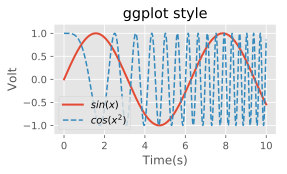

In [32]:
# 前期准备
plt.close("all")
plt.figure(figsize=(4,2))
style.use("ggplot") # 设置子图对象的绘图样式为``ggplot``

# 散点
x = np.linspace(0, 10, 1000)
y = np.sin(x)
z = np.cos(x**2)

# 绘制
plt.plot(x,y,label="$sin(x)$",linewidth=2)
plt.plot(x,z,"--",label="$cos(x^2)$")

# 修饰
plt.xlabel("Time(s)")
plt.ylabel("Volt") 
plt.title("ggplot style") 
plt.ylim(-1.2,1.2) 
plt.legend()
plt.show()

In [33]:
style.use("default")

### 在图表中显示中文

`fontManager.ttflist()`: 查看所有可用的字体对象(Font):  
* 可用字体文件包含两种:
    * matplotlib内嵌的: `site-packages\matplotlib\mpl-data\fonts\ttf`;
    * Windows系统中自带的: `C:\WINDOWS\Fonts\`
* 返回一个字体对象列表: 每个字体对象都有一个字体名和路径;

In [34]:
from matplotlib.font_manager import fontManager
font_lt = fontManager.ttflist
%P len(font_lt); font_lt[38].name; font_lt[38].fname

 1: 618.000,     2: Rockwell,     3: c:\windows\fonts\rockb.ttf,    


查询所有可用的中文字体

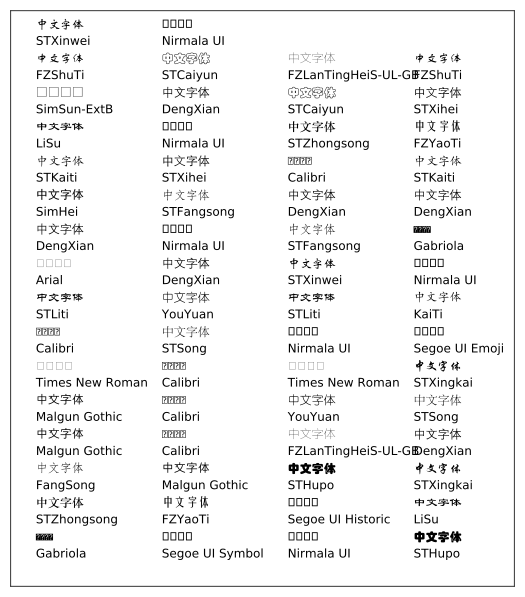

In [35]:
plt.close('all')
fig = plt.figure(figsize=(7, 8))
ax = fig.add_subplot(111)
plt.subplots_adjust(0, 0, 1, 1, 0, 0)
plt.xticks([])
plt.yticks([])

x, y = 0.05, 0.05
fonts = [font.name for font in fontManager.ttflist if 
         os.path.exists(font.fname) and os.stat(font.fname).st_size>1e6] # 只用大于1MB的字体文件才有可能是中文字体文件

font = set(fonts) #设置换行...
dy = (1.0 - y) / (len(fonts) // 4 + (len(fonts)%4 != 0))

for font in fonts:
    t = ax.text(x, y + dy / 2, "中文字体", {'fontname':font, 'fontsize':12}, transform=ax.transAxes)
    ax.text(x, y, font, {'fontsize':12}, transform=ax.transAxes)
    x += 0.25
    if x >= 1.0:
        y += dy
        x = 0.05
plt.show()

`font_lt`中的字体名可以在`fontproperties`参数中直接使用

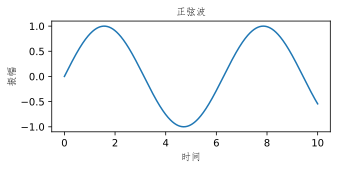

In [36]:
plt.close("all")
plt.figure(figsize=(5,2))
t = np.linspace(0, 10, 1000)
y = np.sin(t)
plt.plot(t, y)
plt.xlabel("时间", fontproperties='fangsong')
plt.ylabel("振幅", fontproperties='fangsong')
plt.title("正弦波", fontproperties='fangsong')

plt.show()

而不在`font_lt`却在`c:\windows\fonts`中的ttc文件(matplotlib只搜索ttf文件), 需要将其变为一个自定义字体对象;

In [37]:
for font in font_lt:
    if font.fname[-4:].lower() !='.ttf':
        print(font.fname) #没有输出

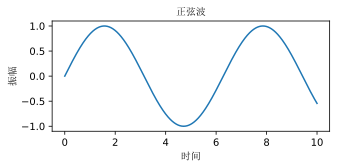

In [38]:
from matplotlib.font_manager import FontProperties
plt.close("all")
plt.figure(figsize=(5,2))

# `FontProperties`对象: 指定图形对象中的文本字体
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=10) 

t = np.linspace(0, 10, 1000)
y = np.sin(t)
plt.plot(t, y)
plt.xlabel("时间", fontproperties=font)
plt.ylabel("振幅", fontproperties=font)
plt.title("正弦波", fontproperties=font)

plt.show()

使用配置字典设置`字体的默认类型`

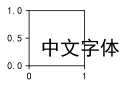

In [39]:
plt.close('all')
plt.rcParams["font.family"] = "SimHei" #黑体字体
plt.figure(figsize = (1,1))
plt.text(0.2, 0.2, "中文字体", fontsize=20)
plt.show()

In [40]:
kk 2

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$!kk2:end>$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
